# Lecture 1: Basic Python


![Python](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)

## Zhentao Shi

### Basics

-  Binary arithmetic operations `+`, `-`, `*` and `/` are performed element by element.
-  Arithmetic operators: exponends are expressed with `**`, and `%` is the reminder.

### Array and Matrix

* Python was not originally designed for scientific computing.

* To work with arrays and matrices, we need the package `numpy`

In [1]:
#Import the NumPy library
import numpy as np

# Import the Pandas library
import pandas as pd

C:\Users\zhent\AppData\Local\Temp\ipykernel_66804\1749334550.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Assignment

In [2]:
a = 1; a

1

In [3]:
b=2; b

2

In [5]:
f = a+b; f

3

In [7]:
d = np.log(f); d

1.0986122886681098

In [8]:
e = np.sqrt(d); e

1.048147073968205

In [9]:
print("e = ", e)

e =  1.048147073968205


Python is case sensitive. 

In [10]:
F = "a word"
print( "F is", F, "but f = ", f)

F is a word but f =  3


### Vectors

In [12]:
a = [1,2,3,4]; a

[1, 2, 3, 4]

In [13]:
a+ [1,2]

[1, 2, 3, 4, 1, 2]

In [14]:
b = np.array([1,2,3,4]); b

array([1, 2, 3, 4])

In [18]:
np.array([1,2]).shape

(2,)

In [19]:
np.array([[1,2]]).shape

(1, 2)

In [21]:
logi1 = np.array([True, True, False]); logi1

array([ True,  True, False])

In [22]:
logi2 = np.array([False, True, True]); logi2

array([False,  True,  True])

In [24]:
logi1 & logi2

array([False,  True, False])

In [25]:
logi1 | logi2

array([ True,  True,  True])

In [27]:
np.sqrt(-1)

C:\Users\zhent\AppData\Local\Temp\ipykernel_66804\3438155168.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(-1)


nan

In [31]:
a = '18'; a

'18'

In [34]:
a = int(a); a

18

In [36]:
af = float(a); af

18.0

#### Example

In [38]:
# Create an array
A = np.array([[1,2,3],[4,5,6]])


In [39]:
A.shape

(2, 3)

In [40]:
B = np.matrix([[1,2,3],[4,5,6]])
A + B

matrix([[ 2,  4,  6],
        [ 8, 10, 12]])

In [43]:
# Create a matrix (2-dimensional array)
M = np.matrix([[1,2],[3,4]])
M

matrix([[1, 2],
        [3, 4]])

## Key Differences Between Python and R

* Python is row-major, while R is column-major.
* The indexing of Python is 0-based, while that of R is 1-based.

In [44]:
D = np.array([1,2,3,4,5,6]).reshape(2,3)
print(D)

[[1 2 3]
 [4 5 6]]


In [45]:
try:
    print(D + [1, 2])  # doesn't work
except ValueError as e:
    print(f"Error: {e}")


Error: operands could not be broadcast together with shapes (2,3) (2,) 


In [46]:
D + [[1],[2]] # broadcasting

array([[2, 3, 4],
       [6, 7, 8]])

In [8]:
F = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'f', 'g']
print(F)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'f', 'g']


In [9]:
F[2:5]

['c', 'd', 'e']

In [10]:
# the index rule in Python is more stringent.
D[0] # the first row

array([1, 2, 3])

In [14]:
D[0,:]

array([1, 2, 3])

In [15]:
D[:,0]

array([1, 4])

In [16]:
D[1,2]

6

In [17]:
# Matrix multiplication
result_mult = np.dot(A, D.T)
print(result_mult)

[[14 32]
 [32 77]]


In [47]:
A @ D.T

array([[14, 32],
       [32, 77]])

In [19]:
A * D

array([[ 1,  4,  9],
       [16, 25, 36]])

In [21]:
# Matrix inverse
inverse_M = np.linalg.inv(M)
print(inverse_M)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [22]:
# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(M)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Singular Value Decomposition (SVD)
U, S, V = np.linalg.svd(A)
print("U matrix:\n", U)
print("Singular values:\n", S)
print("V matrix:\n", V)

Eigenvalues:
 [-0.37228132  5.37228132]
Eigenvectors:
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
U matrix:
 [[-0.3863177   0.92236578]
 [-0.92236578 -0.3863177 ]]
Singular values:
 [9.508032   0.77286964]
V matrix:
 [[-0.42866713 -0.56630692 -0.7039467 ]
 [-0.80596391 -0.11238241  0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]


For further readings, please find a list of basic commands in the documentation of NumPy: 
https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html

### OLS-Example
OLS estimation with one $x$ regressor and a constant.
Graduate textbook expresses the OLS in matrix form
$\hat{\beta} = (X' X)^{-1} X'y.$
To conduct OLS estimation in Python, we literally translate the mathematical expression into code.

__Step 1__: We need data $Y$ and $X$ to run OLS. We simulate an artificial dataset.

In [48]:
# np.random.seed(111) # can be removed to allow the result to change
# set the parameters
n = 10
b0 = np.matrix([ [1],[2] ] )
# generate the data
e = np.random.normal(size = (n,1))
X = np.hstack((np.ones((n, 1)), np.random.normal(size = (n, 1))))
y = np.dot(X, b0) + e

__Step 2:__ translate the formula to code

In [49]:
# OLS estimator
bhat = np.linalg.inv(X.T @ X) @ X.T @ y
print(bhat)

[[0.88633463]
 [1.89342287]]


__Step 3 (additional):__ plot the regression graph with the scatter points and the regression line.
Further compare the regression line (black) with the true coefficient line (red).

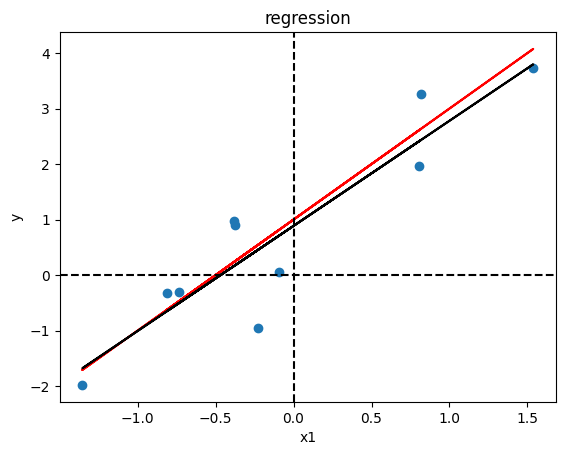

In [50]:
# Import MathPlotLib
import matplotlib.pyplot as plt
X1 = X[:, 1]
plt.plot(X1, y, 'o')
plt.plot(X1, X @ b0, color='red', linestyle='-')
plt.plot(X1, X @ bhat, color='black', linestyle='-')
plt.title('regression')
plt.xlabel('x1')
plt.ylabel('y')
plt.axhline(0, color = 'black', linestyle = 'dashed')
plt.axvline(0, color = 'black', linestyle = 'dashed')
plt.show()

__Step 4:__ In econometrics we are often interested in hypothesis testing.

The *t*-statistic is widely used.
To test the null $H_0: \beta_2 = 1$, we compute the associated *t*-statistic.
Again, this is a translation.
$$
t  =  \frac{\hat{\beta}_2 - \beta_{02}}{ \hat{\sigma}_{\hat{\beta}_2}  }
   =  \frac{\hat{\beta}_2 - \beta_{02}}{ \sqrt{ \left[ (X'X)^{-1} \hat{\sigma}^2 \right]_{22} } }.
$$
where $[\cdot]_{22}$ is the (2,2)-element of a matrix.

In [ ]:
# Import Math

# Calculate the t-value
bhat2 = bhat.item(1) # item( ) is a new function I learn today

e_hat = y - np.dot(X, bhat)
sigma_hat_square = np.dot(e_hat.T, e_hat).item(0) / (n-2)

Sigma_B = np.linalg.inv(np.dot(X.T, X)) * sigma_hat_square
t_value_2 = (bhat2 - b0[1, 0]) / np.sqrt(Sigma_B[1, 1])
print(t_value_2)

### Package/Module/Library

* Python has numerous useful packages/modules/libraries. 
* Install the targeted package into the environment.



### Input and Output

To read and write csv files in Python, use the pandas library.
`!pip install package_name`

#### Example:

In [ ]:
import pandas as pd
sample_data = pd.read_csv('data_example/AJR.csv')
sample_data.head()

In [ ]:
sample_data = sample_data.dropna()

# write the sample_data to a csv file
sample_data.to_csv('data_example/AJR_from_py.csv', index = False)


### Statistics

* The package `SciPy` is for statistics. 
* Commonly used probability distributions in `SciPy.stats`


##### Example:

In [ ]:
# Import Packages

import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


x = np.linspace(0.01, 16, num = 1600)
y = stats.chi2.pdf(x, 3)
z = stats.chi2.rvs(3, size = 1000)

plt.plot(x, y, linestyle = '-', color = 'black')
sns.kdeplot(z, color = 'red')
plt.xlim(-0.5, 16)
plt.ylim(-0.01, 0.25)
plt.xlabel('X')
plt.ylabel('density')
plt.show()

In [ ]:
crit = stats.chi2.ppf(q = 0.95, df = 3)
print(len([i for i in z if i > crit]) / len(z))

### User-defined function

The format of a user-defined function in Python is

```            
def function_name(input):

    expressions 
    
    return output
```

##### Example:

If the central limit theorem is applicable, then
we can calculate the 95% two-sided asymptotic confidence interval as
$$\left(\hat{\mu} - \frac{1.96}{\sqrt{n}} \hat{\sigma}, \hat{\mu} + \frac{1.96}{\sqrt{n}} \hat{\sigma} \right)$$
from a given sample.
It is an easy job.

In [ ]:
#construct confidence interval

def CI(x):
    #x is a vector of random variables
    n = len(x)
    mu = np.mean(x)
    sig = np.std(x)
    upper = mu + 1.96 / np.sqrt(n) * sig
    lower = mu - 1.96 / np.sqrt(n) * sig
    return {'lower': lower, 'upper': upper}
    # return a tuple

### Flow Control

* `if` is used for choice
* `for` or `while` is used for loops.

**Example**

Calculate the empirical coverage probability of a Poisson distribution of degrees of freedom 2.
We conduct this experiment for 1000 times.


In [ ]:
import datetime
from scipy import stats

Rep = 1000
sample_size = 100
capture = [0] * Rep


for i in range(Rep):
    mu = 2
    x = stats.poisson.rvs(mu, size = sample_size)
    bounds = CI(x)
    if (bounds['lower'] <= mu and mu <= bounds['upper']):
        capture[i] = 1
    

print(np.mean(capture))

### Statistical Model

* Statistical models are formulated as `y~x`
* In the package `scikit-learn`, we run OLS using `LinearRegression()`

In [ ]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
T = 30
p = 1
b0 = [[1.], [2.]]

# Generate data
x = stats.norm.rvs(size=[T, p])
x = sm.add_constant(x)  # Add intercept
y = np.dot(x, b0) + stats.norm.rvs(size=[T, 1])

# Linear model
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

## Display

* `result` object is a list containing the regression results. 
  * Estimated coefficients, 
  * t-stat
  * F-stat
  * R-sqaured.

In [ ]:
plt.plot(results.fittedvalues, color = 'red', label = 'Fitted Value')
plt.plot(y, color = 'blue', linestyle = 'dashed', label = 'True Value')
plt.title('Fitted Value')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()